## Математичне формулювання
Модель базується на диференціальному рівнянні зміни запасів у часі:

 $$
 \frac{dS(t)}{dt} = \text{Inflow}(t) - \text{Outflow}(t)
 $$

де:
- $S(t)$ — рівень запасів у момент часу $t$
- $\text{Outflow}(t)$ = $d(t)$ — попит у момент часу $t$
- $\text{Inflow}(t)$ = $EOQ(t - \tau)$, якщо було замовлення у $( t - \tau)$, де $\tau$ — затримка постачання


## Системна динаміка EOQ
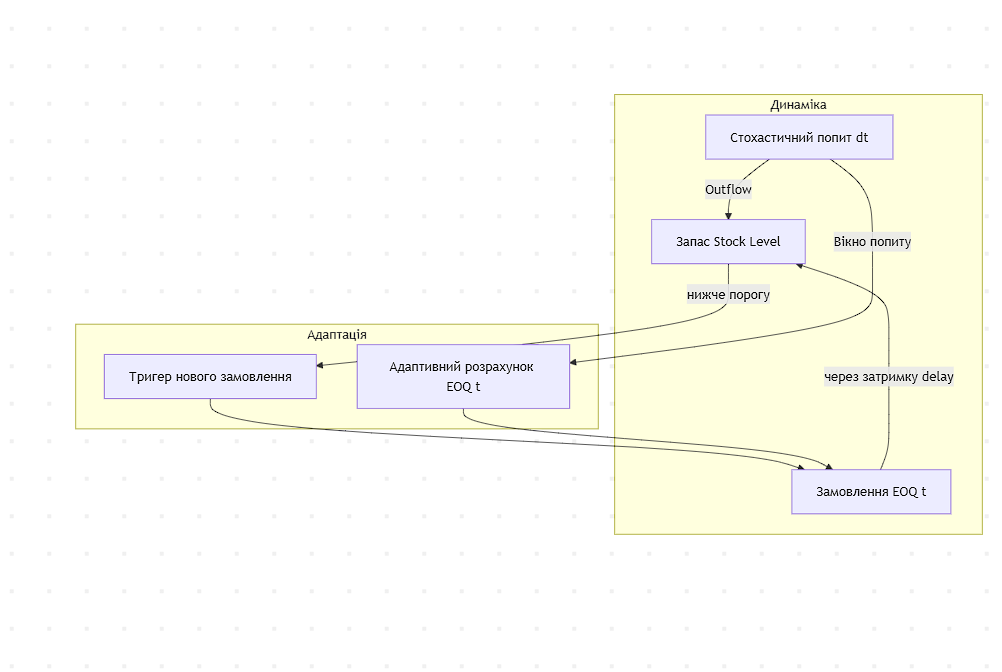

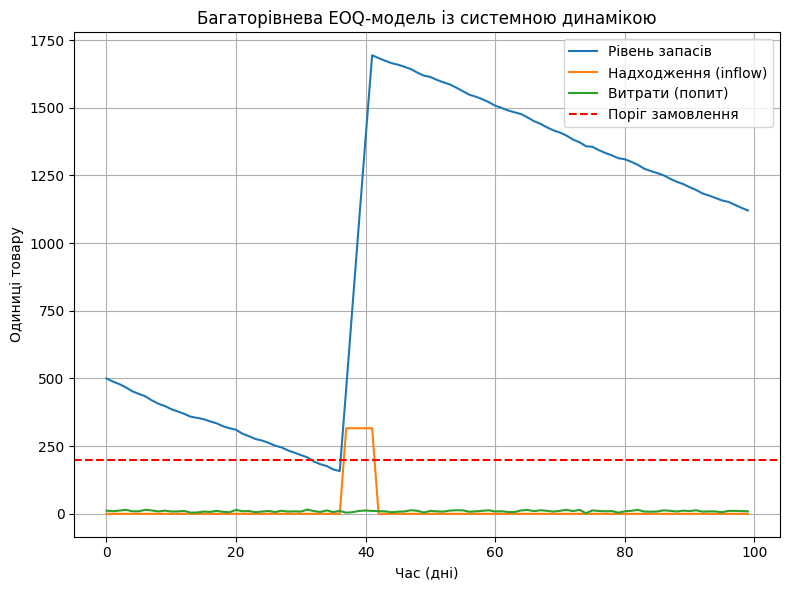

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Параметри
T = 100  # кількість днів моделювання
delay = 5  # затримка постачання (у днях)
initial_stock = 500  # початковий рівень запасів
eoq = 316  # розрахована EOQ (може бути змінена)
threshold = 200  # рівень, за якого робимо нове замовлення

# Стохастичний попит (наприклад, нормальний розподіл)
np.random.seed(42)
daily_demand = np.maximum(0, np.random.normal(loc=10, scale=3, size=T))

# Масиви для збереження даних
stock_level = np.zeros(T)
inflow = np.zeros(T)
outflow = daily_demand.copy()
orders = []

# Початковий запас
stock_level[0] = initial_stock

# Симуляція системної динаміки
for t in range(1, T):
    # Витрати запасів
    stock_level[t] = max(stock_level[t-1] - outflow[t-1], 0)

    # Прихід товару (через затримку постачання)
    if t >= delay and t - delay in orders:
        stock_level[t] += eoq
        inflow[t] = eoq

    # Якщо рівень запасів нижчий за поріг — робимо замовлення
    if stock_level[t] < threshold:
        orders.append(t)

# Візуалізація
plt.figure(figsize=(8, 6))
plt.plot(stock_level, label='Рівень запасів')
plt.plot(inflow, label='Надходження (inflow)')
plt.plot(outflow, label='Витрати (попит)')
plt.axhline(y=threshold, color='r', linestyle='--', label='Поріг замовлення')
plt.title('Багаторівнева EOQ-модель із системною динамікою')
plt.xlabel('Час (дні)')
plt.ylabel('Одиниці товару')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Адаптивний розрахунок EOQ

 $$
 EOQ(t) = \sqrt{\frac{2 \cdot \bar{D}(t) \cdot S_c}{H}}
 $$

де:
- $\bar{D}(t) = \frac{1}{w} \sum_{i=t-w}^{t} d(i) $ — середній попит за останнє вікно \( w \)
- $S_c$ — вартість оформлення замовлення
- $H$ — вартість зберігання


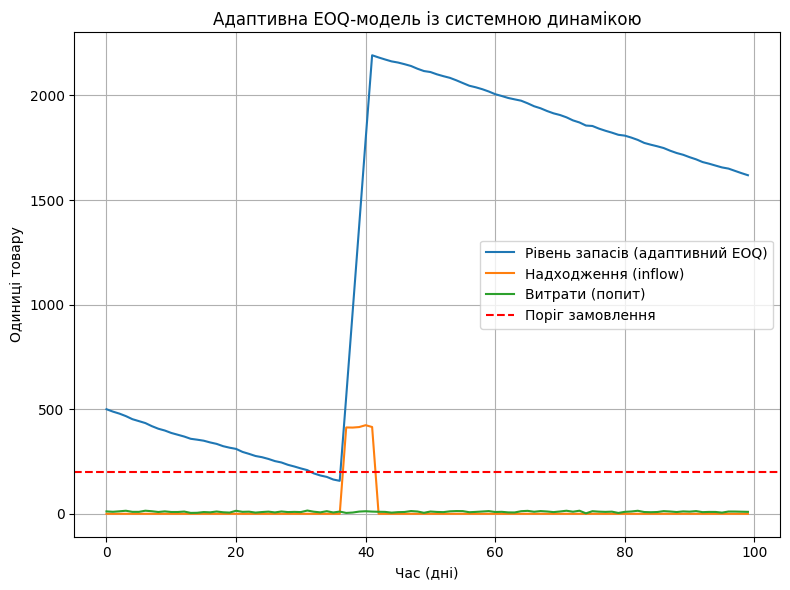

In [4]:
# Параметри
window = 10  # вікно для обчислення середнього попиту
S = 50  # Вартість оформлення одного замовлення
H = 2   # Вартість зберігання одиниці товару

# Оновлені масиви
stock_level_adaptive = np.zeros(T)
inflow_adaptive = np.zeros(T)
orders_adaptive = []
eoq_adaptive = np.zeros(T)

# Початкові умови
stock_level_adaptive[0] = initial_stock
eoq_adaptive[0] = eoq  # перше значення — базове EOQ

# Симуляція з адаптивною EOQ
for t in range(1, T):
    # Витрати запасів
    stock_level_adaptive[t] = max(stock_level_adaptive[t-1] - outflow[t-1], 0)

    # Оновлення EOQ на основі ковзного середнього попиту
    if t >= window:
        avg_demand = np.mean(outflow[t-window:t])
        eoq_adaptive[t] = np.sqrt((2 * avg_demand * 365 * S) / H)
    else:
        eoq_adaptive[t] = eoq_adaptive[t-1]

    # Надходження товару (через затримку)
    if t >= delay and t - delay in orders_adaptive:
        stock_level_adaptive[t] += eoq_adaptive[t - delay]
        inflow_adaptive[t] = eoq_adaptive[t - delay]

    # Замовлення, якщо запас нижче порогу
    if stock_level_adaptive[t] < threshold:
        orders_adaptive.append(t)

# Візуалізація
plt.figure(figsize=(8, 6))
plt.plot(stock_level_adaptive, label='Рівень запасів (адаптивний EOQ)')
plt.plot(inflow_adaptive, label='Надходження (inflow)')
plt.plot(outflow, label='Витрати (попит)')
plt.axhline(y=threshold, color='r', linestyle='--', label='Поріг замовлення')
plt.title('Адаптивна EOQ-модель із системною динамікою')
plt.xlabel('Час (дні)')
plt.ylabel('Одиниці товару')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
